In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.models as models
from torchvision import transforms
import seaborn as sns
import json
import cv2

In [3]:
data = []
with open('data/train.jsonl') as f:
    for el in f:
        data.append(json.loads(el))

In [10]:
data[0]

{'id': 42953,
 'img': 'img/42953.png',
 'label': 0,
 'text': 'its their character not their color that matters'}

In [74]:
inception = models.resnet18()

In [20]:
sample = cv2.imread('/Users/nissani/Desktop/Hateful_Memes_Project/ExampleProject/data/' + data[0]['img']).resize()

In [61]:
sample = cv2.resize(sample, (299,299), interpolation = cv2.INTER_AREA)

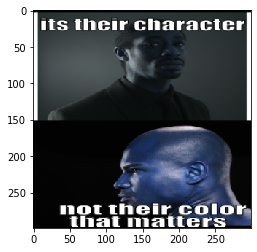

In [62]:
plt.imshow(sample)

In [68]:
torch_form = torch.Tensor(sample)

In [70]:
torch_form=torch_form.T

In [71]:
torch_form=torch_form.view((1,3,299,299))

In [72]:
torch_form.shape

torch.Size([1, 3, 299, 299])

In [76]:
resnet_features = inception(torch_form)

In [79]:
resnet_features.argmax()

tensor(595)

In [ ]:
for j in inception.children():  print(j)

In [86]:
from sentence_transformers import SentenceTransformer
path="/Users/nissani/Downloads/bert-base-nli-mean-tokens"
model=SentenceTransformer(path)

In [112]:
sentences=["I hate my dog","I love my dog","cat", "dog"]

In [113]:
embeddings=model.encode(sentences)

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
stacked = np.stack(embeddings)

In [116]:
cosine_similarity(stacked)

array([[1.0000002 , 0.40123773, 0.15187287, 0.43015474],
       [0.40123773, 0.9999997 , 0.0826402 , 0.6330832 ],
       [0.15187287, 0.0826402 , 1.0000005 , 0.23537225],
       [0.43015474, 0.6330832 , 0.23537225, 1.        ]], dtype=float32)